> # Classification problem in supervised machine learning
---
> # Heart disease prediction
---

# 1. Connection to drive and import libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%%capture
!pip install mediapipe
!pip install sklearn
!pip install scikit-plot

In [206]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import yellowbrick
import pickle

print(f"""
  Library's versions:
    - pandas: {pd.__version__}
    - numpy: {np.__version__}
    - sklearn: {sklearn.__version__}
    - seaborn: {sns.__version__}
    - yellowbrick: {yellowbrick.__version__}
""")


  Library's versions:
    - pandas: 1.3.5
    - numpy: 1.21.6
    - sklearn: 1.0.2
    - seaborn: 0.11.2
    - yellowbrick: 1.5



# 2. Data Acquisition
---
> [**Heart Disease Data Link**](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [207]:
PROJECT_PATH = '/content/drive/MyDrive/projects'

In [208]:
FILE_PATH = f'{PROJECT_PATH}/dataset/heart_data.csv'
heart_df = pd.read_csv(FILE_PATH)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [209]:
print(f'Dataset size (rows, columns): {heart_df.shape}')

Dataset size (rows, columns): (1025, 14)


In [210]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [211]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [212]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [213]:
class DataVisualization:

    def __init__(self, df):
        self.df = df

    def correlation_plot(self):
        plt.figure(figsize = (12,12))
        sns.heatmap(
            self.df.corr(), 
            cbar=True, 
            square=True, 
            fmt='.2f',
            annot=True, 
            annot_kws={'size': 14}, 
            cmap='coolwarm'
        )
        plt.title('Correlation Heatmap', fontsize = 20)
        plt.show()

In [214]:
data_visualizer = DataVisualization(heart_df)

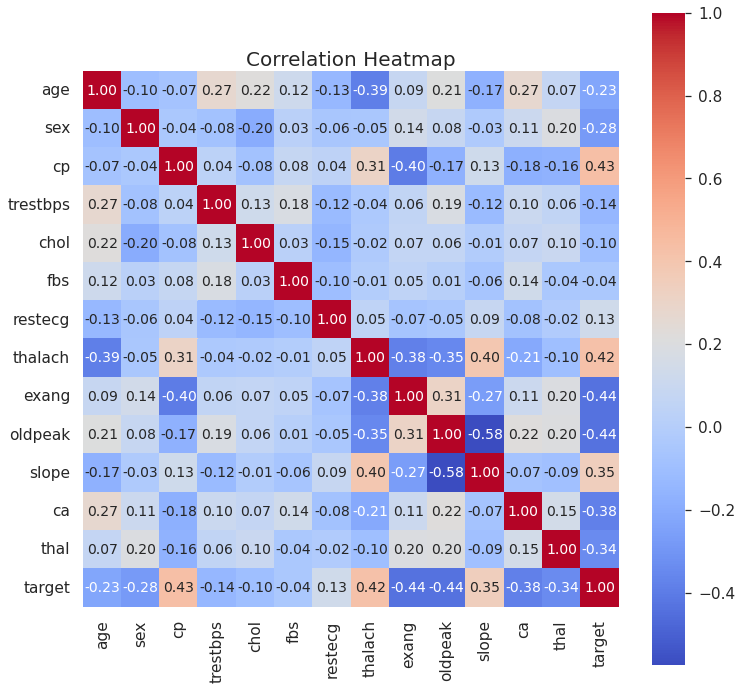

In [215]:
data_visualizer.correlation_plot()

In [216]:
heart_df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# 3. Data Processing
---
Splittin data into features nad targets
- X - features
- y - targets

In [217]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [218]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [219]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [220]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [221]:
from sklearn.model_selection import train_test_split
from yellowbrick.target import ClassBalance

class DataProcessor:

    def __init__(self, X, y):
        self.X = X 
        self.y = y
        self.classes = np.unique(y).tolist()
        print(f'''
            X - features (wiersze, kolumny): {self.X.shape} 
            y - labels (wiersze, 1 kolumna): {self.y.shape}
            Unique classes: {self.classes}
            Number of unique classes: {len(self.classes)}
        ''')
        self.X_train = []
        self.X_test = [] 
        self.y_train = [] 
        self.y_test = []

    def split_data(self, test_size: int) -> dict:
          self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
              self.X,             
              self.y,           
              test_size=test_size,  
              random_state=42,     
              stratify=y
          ) 

          print(f"""
            Input: 
                (Rows No, Column No)
                X: {X.shape} - 100% - feature dataset
                y: {y.shape} - 100% - target dataset
            Output:
                - training dataset:
                    X_train: {self.X_train.shape} - {round(len(self.X_train) * 100/len(X))}%
                    y_train: {self.y_train.shape} - {round(len(self.y_train) * 100/len(y))}%
                - testing dataset:
                    X_test: {self.X_test.shape} - {round(len(self.X_test) * 100/len(X))}%
                    y_test: {self.y_test.shape} - {round(len(self.y_test) * 100/len(y))}%
                - Number of unique classes in dataset: {len(self.classes)}
                - Unique classes: {self.classes}
          """)

          dataset = {
              'X': self.X,
              'y': self.y,
              'X_train': self.X_train, 
              'y_train': self.y_train,
              'X_test': self.X_test,  
              'y_test': self.y_test,
              'classes': self.classes
          }

          return dataset

    def plot_class_balance_in_dataset(self) -> None:
        visualizer = ClassBalance(size=(1200, 500))
        visualizer.fit(y)
        visualizer.show()  
    
    def plot_class_balance_in_dataset_in_percentage(self) -> None:
        sns.set(font_scale=1.4)
        y.value_counts(
            normalize=True, 
            sort=True, 
            ascending=False, 
            dropna=False
          ).mul(100).round(1).plot(kind='bar', figsize=(16, 6), rot=0)
        plt.xlabel("Class", labelpad=14)
        plt.ylabel("Value [%]", labelpad=14)
        plt.title("Percentage share of classes in the dataset", y=1.02)

    def plot_class_balance_between_train_and_test_dataset(self) -> None:
        visualizer = ClassBalance(size=(1200, 500))
        visualizer.fit(self.y_train, self.y_test)
        visualizer.show()
    
    def plot_class_balance_between_train_and_test_dataset_in_percentage(self) -> None:
        y_train_values = []
        for index, name in enumerate(self.y_train.value_counts().index.tolist()):
            y_train_values.append(self.y_train.value_counts()[index] * 100 /  len(self.y))

        y_test_values = []
        for index, name in enumerate(self.y_test.value_counts().index.tolist()):
            y_test_values.append(self.y_test.value_counts()[index] * 100 / len(self.y))

        df_train = pd.DataFrame({'ACTION': self.classes,'y_train': y_train_values}, columns=['ACTION', 'y_train'])
        df_test = pd.DataFrame({'ACTION': self.classes, 'y_test': y_test_values}, columns=['ACTION', 'y_test'])
        df_merged = pd.merge(df_train, df_test, on='ACTION')
        ax = df_merged.plot.bar(x='ACTION', figsize=(16, 6), rot=0)
        plt.xlabel("Class", labelpad=14)
        plt.ylabel("Value [%]", labelpad=14)
        plt.title("Percentage share of classes in the split dataset", y=1.02)

In [222]:
data_processor = DataProcessor(X=X, y=y)


            X - features (wiersze, kolumny): (1025, 13) 
            y - labels (wiersze, 1 kolumna): (1025,)
            Unique classes: [0, 1]
            Number of unique classes: 2
        


In [223]:
dataset = data_processor.split_data(test_size=0.3)


            Input: 
                (Rows No, Column No)
                X: (1025, 13) - 100% - feature dataset
                y: (1025,) - 100% - target dataset
            Output:
                - training dataset:
                    X_train: (717, 13) - 70%
                    y_train: (717,) - 70%
                - testing dataset:
                    X_test: (308, 13) - 30%
                    y_test: (308,) - 30%
                - Number of unique classes in dataset: 2
                - Unique classes: [0, 1]
          


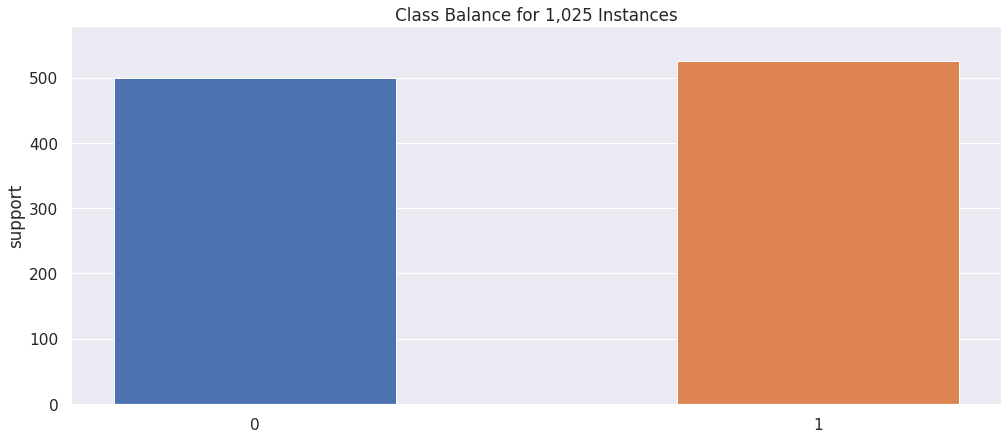

In [224]:
data_processor.plot_class_balance_in_dataset()

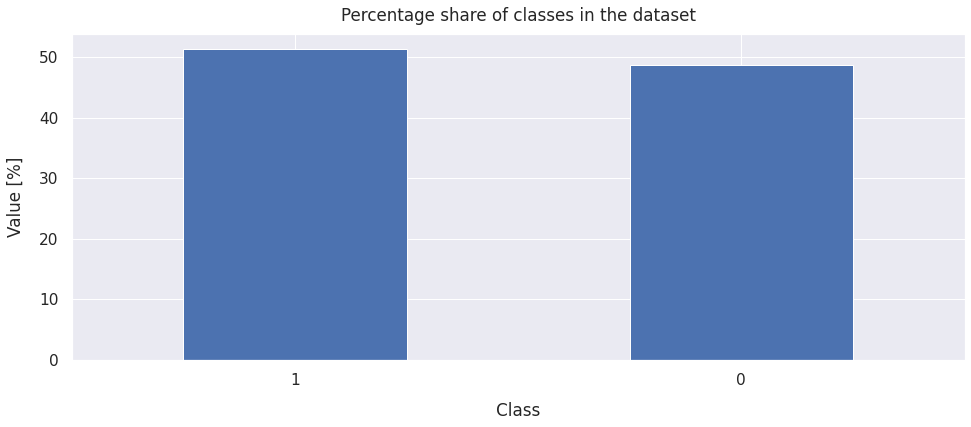

In [225]:
data_processor.plot_class_balance_in_dataset_in_percentage() 

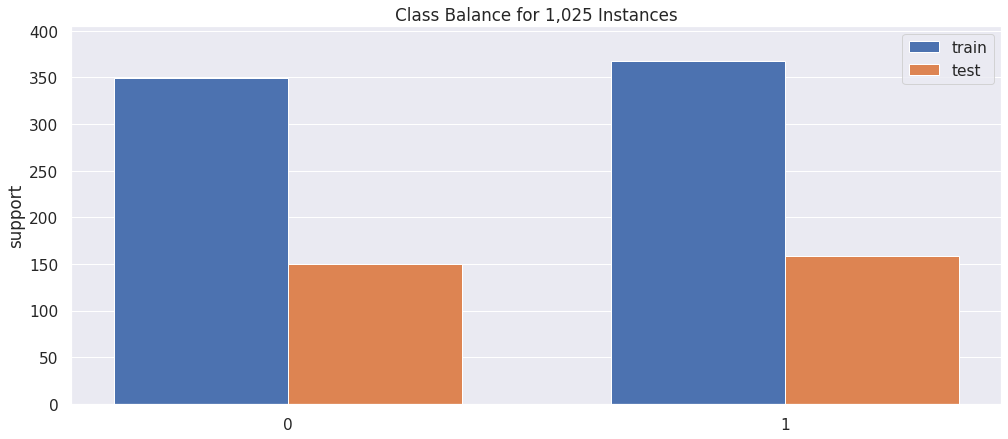

In [226]:
data_processor.plot_class_balance_between_train_and_test_dataset()

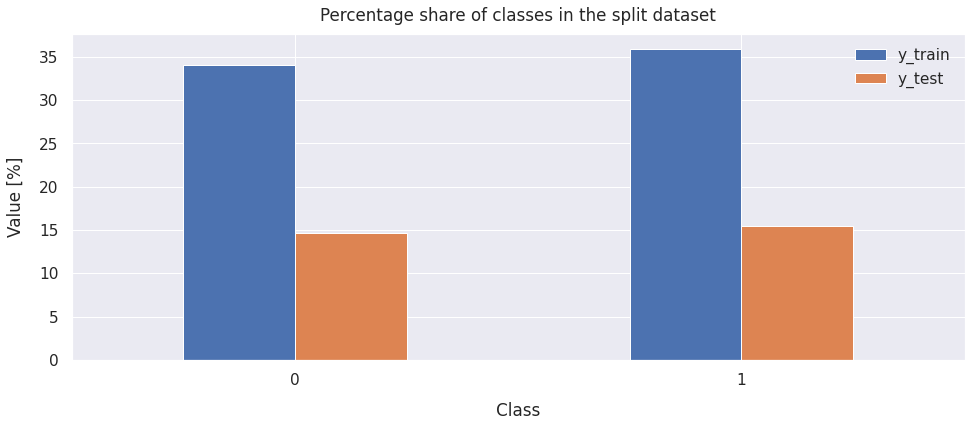

In [227]:
data_processor.plot_class_balance_between_train_and_test_dataset_in_percentage()

# 4. Model Training
---

In [230]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


models: dict = {
    'KNN': KNeighborsClassifier(n_neighbors =5),
    'SVM': SVC(probability=True),
    'LOGISTIC_REGRESSION': LogisticRegression(solver='liblinear'),
    'NAIVE_BAYES': GaussianNB(),
}

In [231]:
from abc import ABC
from sklearn import metrics
from yellowbrick.model_selection import LearningCurve 

class ModelPerformance(ABC):

    def __init__(self, models: dict, dataset: dict):
        self.models = models 
        self.classifiers: dict = {}
        self.classifiers_df: pd.DataFrame = None
        self.scores: list  = [] 

        self.scoring = 'f1_weighted'
        self.cv = 5
        self.n_jobs = 5
        self.train_sizes = np.linspace(0.3, 1.0, 10)
        
        self.X = dataset['X']
        self.X_train = dataset['X_train']
        self.X_test = dataset['X_test']
        self.y = dataset['y']
        self.y_train = dataset['y_train']
        self.y_test = dataset['y_test']

    def _calculate_model_score(self, algorithm: str, classifier: object) -> None:
      y_test_pred = classifier.predict(self.X_test)
            
      accuracy = metrics.accuracy_score(self.y_test, y_test_pred)
      f1 = metrics.f1_score(self.y_test, y_test_pred, average='weighted')
      precision = metrics.precision_score(self.y_test, y_test_pred, average='weighted')
      recall = metrics.recall_score(self.y_test, y_test_pred, average='weighted')

      self.scores.append({            
          'Model': algorithm,
          'Accuracy': accuracy,
          'F1-Score': f1,
          'Precision': precision,
          'Recall': recall  
      })
      
    def plot_learning_curve(self) -> None:
        for algo, classifier in self.classifiers.items():
              visualizer = LearningCurve(classifier, cv=self.cv, scoring=self.scoring, 
                                         n_jobs=self.n_jobs, train_sizes=self.train_sizes, size=(800, 500))
              visualizer.fit(self.X, self.y)  
              visualizer.show()

In [232]:
class ModelCreation(ModelPerformance):

    def __init__(self, models: dict, dataset: dict):
        super(ModelCreation, self).__init__(models, dataset)
        for index, model in enumerate(self.models): print(f'{index + 1} - {model}')

    def build_model(self):
        for algorithm, model in self.models.items():
            model.fit(self.X_train, self.y_train) 
            self.classifiers[algorithm] = model  
            print(f'{model} has been trained')
            self._calculate_model_score(algorithm, model)

        self.classifiers_df = pd.DataFrame(self.scores, 
                                           columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

In [233]:
model_creator = ModelCreation(models=models, dataset=dataset)

1 - KNN
2 - SVM
3 - LOGISTIC_REGRESSION
4 - NAIVE_BAYES


In [234]:
model_creator.build_model()

KNeighborsClassifier() has been trained
SVC(probability=True) has been trained
LogisticRegression(solver='liblinear') has been trained
GaussianNB() has been trained


In [235]:
model_creator.classifiers_df

,Model,Accuracy,F1-Score,Precision,Recall
0,KNN,0.831169,0.831197,0.831506,0.831169
1,SVM,0.886364,0.886353,0.886361,0.886364
2,LOGISTIC_REGRESSION,0.824675,0.823804,0.828660,0.824675
3,NAIVE_BAYES,0.834416,0.834400,0.834402,0.834416


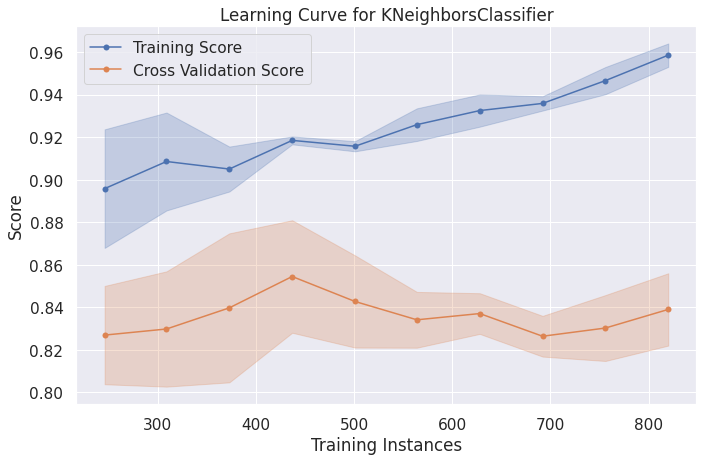

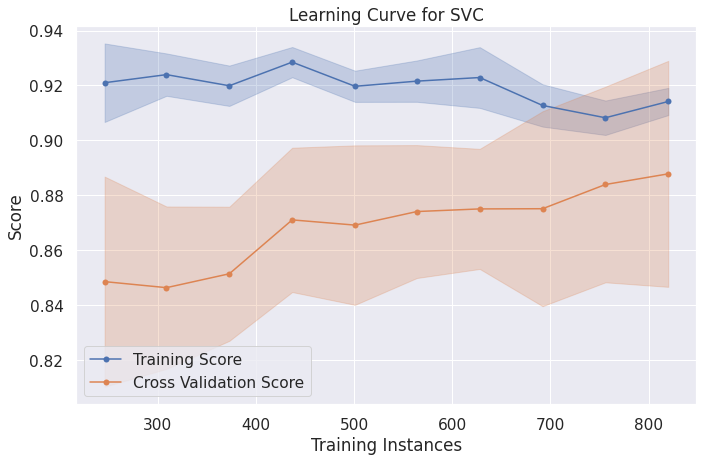

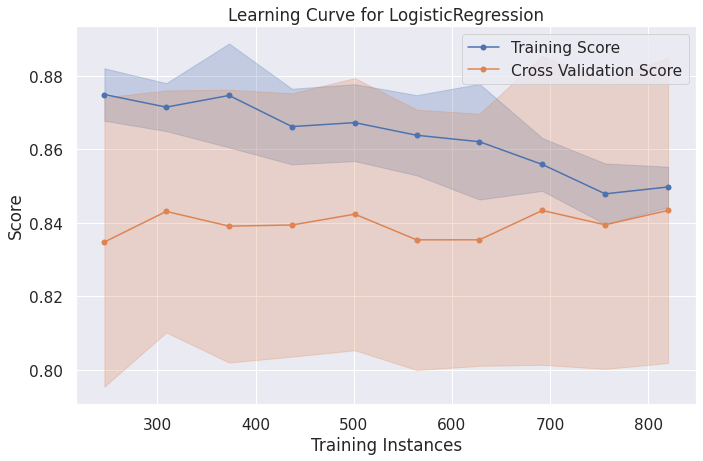

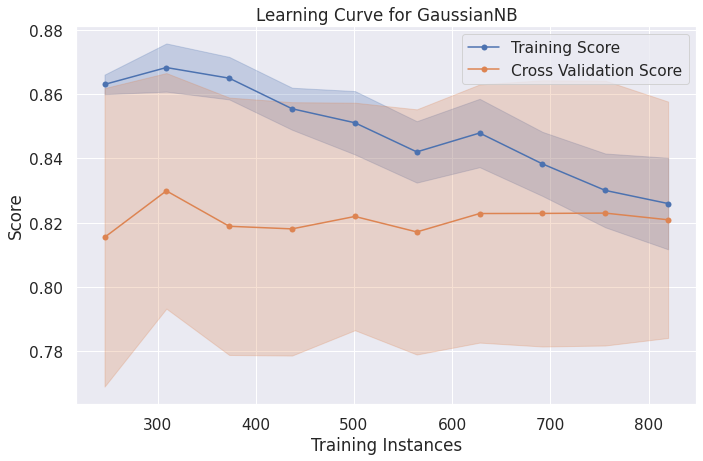

In [236]:
model_creator.plot_learning_curve()

In [237]:
classifiers = model_creator.classifiers
classifiers

{'KNN': KNeighborsClassifier(),
 'SVM': SVC(probability=True),
 'LOGISTIC_REGRESSION': LogisticRegression(solver='liblinear'),
 'NAIVE_BAYES': GaussianNB()}

# 5. Model Evaluation

In [245]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError 
from yellowbrick.classifier import DiscriminationThreshold
from sklearn import metrics

class ModelEvaluation:

    def __init__(self, estimators: dict, dataset: dict):
        self.estimators = estimators
        self.X = dataset['X']
        self.X_train = dataset['X_train']
        self.X_test = dataset['X_test']
        self.y = dataset['y']
        self.y_train = dataset['y_train']
        self.y_test = dataset['y_test']
        self.classes = dataset['classes']

    def plot_classification_report(self) -> None:
        for algo, model in self.estimators.items():
            visualizer = ClassificationReport(model, classes=self.classes, is_fitted=True, size=(800, 500))
            visualizer.class_counts_ = len(self.classes)
            visualizer.score(self.X_test, self.y_test) 
            visualizer.show()

    def plot_scores(self) -> None:
        accuracy_scores = {}
        precision_scores = {}
        recall_scores = {}
        f1_scores = {}
        for algo, model in self.estimators.items():
            y_pred = model.predict(self.X_test)
            accuracy_dict = {'Accuracy': metrics.accuracy_score(self.y_test, y_pred)}
            accuracy_scores[algo] = accuracy_dict
            precision_dict = {'Precision': metrics.precision_score(self.y_test, y_pred)}
            precision_scores[algo] = precision_dict
            recall_dict = {'Recall': metrics.recall_score(self.y_test, y_pred)}
            recall_scores[algo] = recall_dict
            f1_dict = {'F1-Score': metrics.f1_score(self.y_test, y_pred)}
            f1_scores[algo] = f1_dict
        
        fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
        pd.DataFrame(accuracy_scores).plot.bar(ax=ax1, title='Accuracy', ylabel='Value')
        pd.DataFrame(precision_scores).plot.bar(ax=ax2, title='Precision', ylabel='Value')
        pd.DataFrame(recall_scores).plot.bar(ax=ax3, title='Recall', ylabel='Value')
        pd.DataFrame(f1_scores).plot.bar(ax=ax4, title='F1-Score', ylabel='Value')

    def plot_confusion_matrix(self) -> None:
        for algo, model in self.estimators.items():
            visualizer = ConfusionMatrix(model, percent=True, is_fitted=True, size=(800, 500))
            visualizer.class_counts_ = len(self.classes)
            visualizer.score(self.X_test, self.y_test)
            visualizer.show()

    def plot_roc_auc(self) -> None:
        for algo, model in self.estimators.items():
            y_pred_prob = model.predict_proba(self.X_test)
            skplt.metrics.plot_roc(self.y_test, y_pred_prob, plot_micro=False, plot_macro=False, title=f'ROC for {algo}', text_fontsize=10)
            plt.show()

    def plot_precision_recal_curve(self) -> None:
        for algo, model in self.estimators.items():
            y_pred_prob = model.predict_proba(self.X_test)
            skplt.metrics.plot_precision_recall(self.y_test, y_pred_prob, plot_micro=False, title=f'Precision Recall Curve for {algo}', text_fontsize=10)
            plt.show()

    def plot_class_prediction_error(self) -> None:
        for algo, model in self.estimators.items():
            visualizer = ClassPredictionError(model, size=(800, 500), is_fitted=True, title=f'Class prediction error for {algo}')
            visualizer.class_counts_ = len(self.classes)
            visualizer.score(self.X_test, self.y_test)      
            visualizer.show() 

    def plot_discrimination_threshold(self) -> None:
      for algo, model in self.estimators.items():
        visualizer = DiscriminationThreshold(model)
        visualizer.fit(X, y) 
        visualizer.show()   

In [246]:
model_evaluator = ModelEvaluation(estimators=classifiers, dataset=dataset)

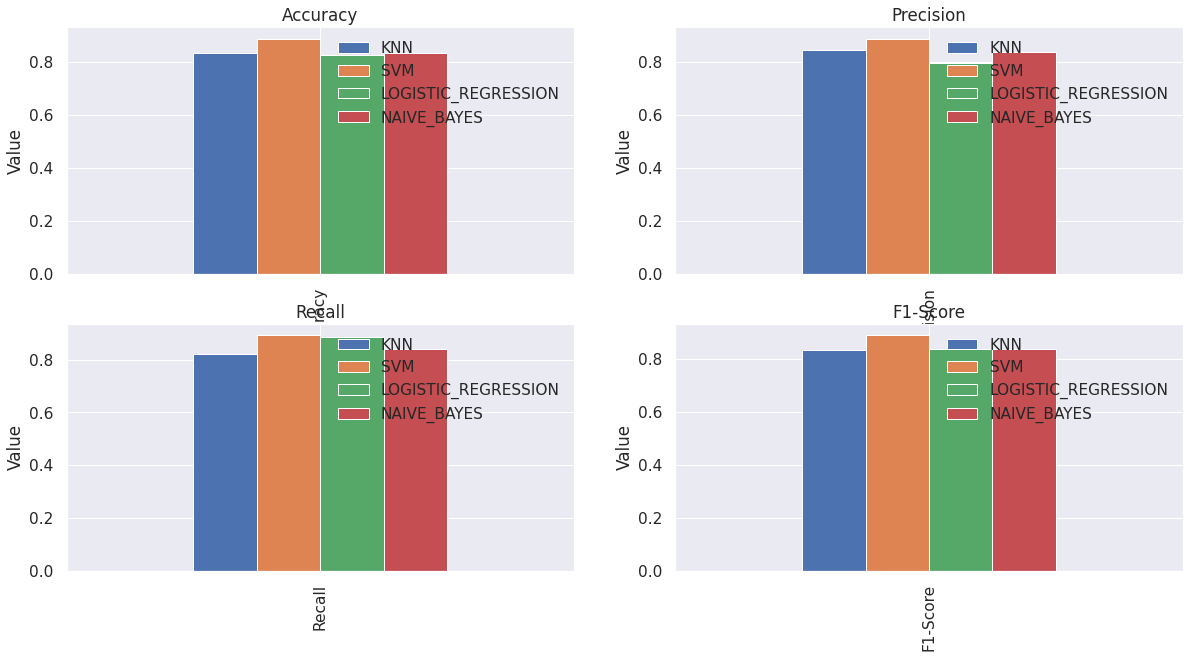

In [247]:
model_evaluator.plot_scores()

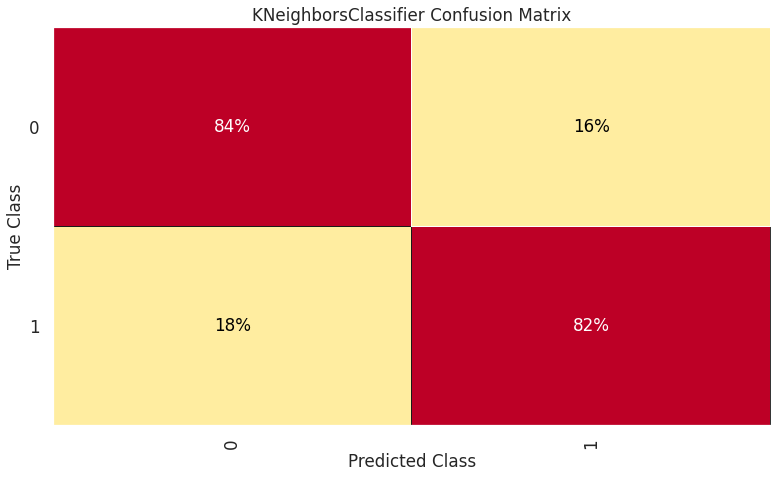

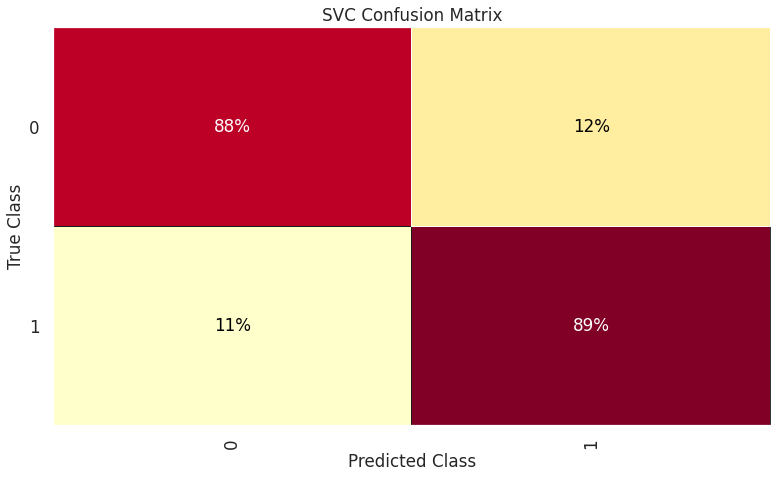

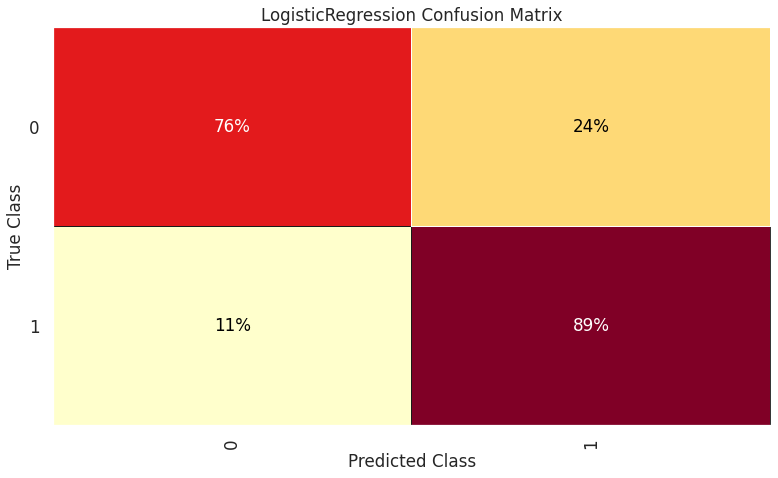

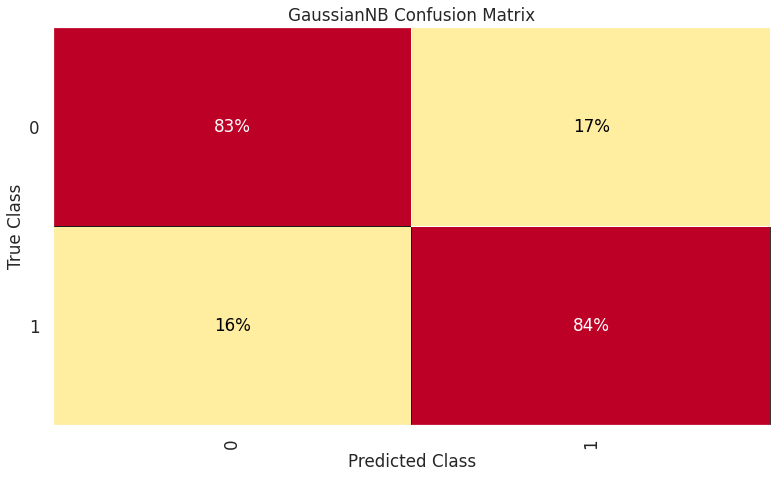

In [248]:
model_evaluator.plot_confusion_matrix()

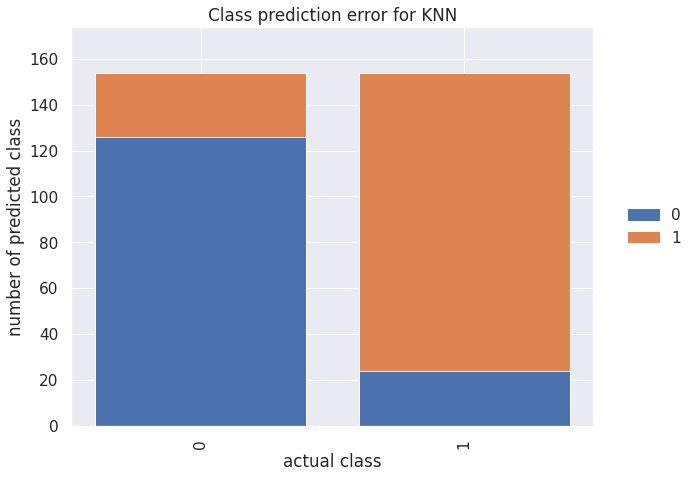

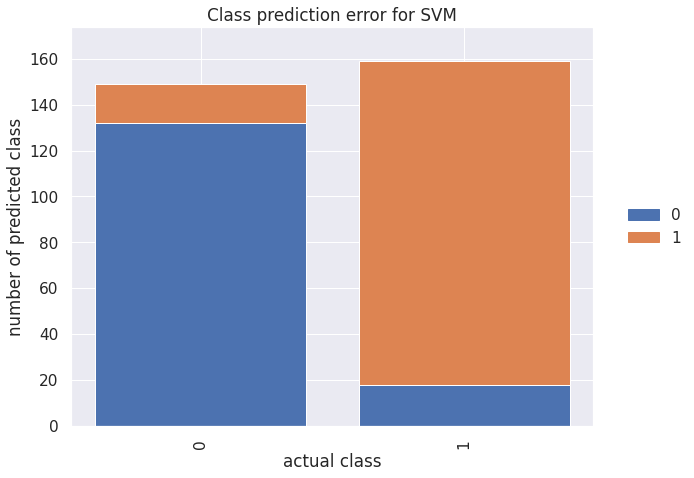

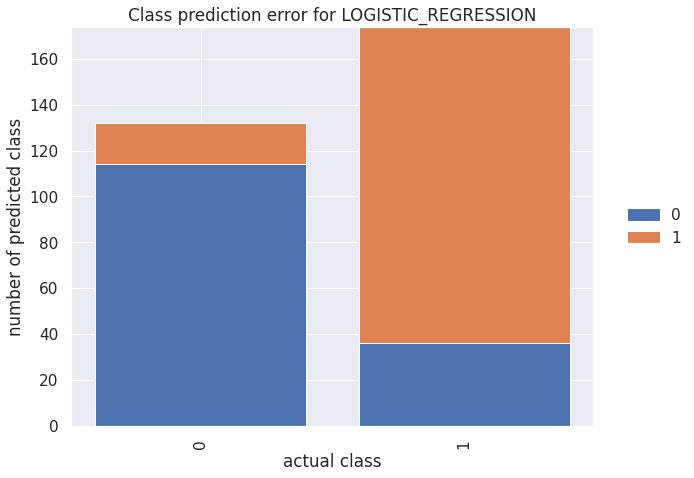

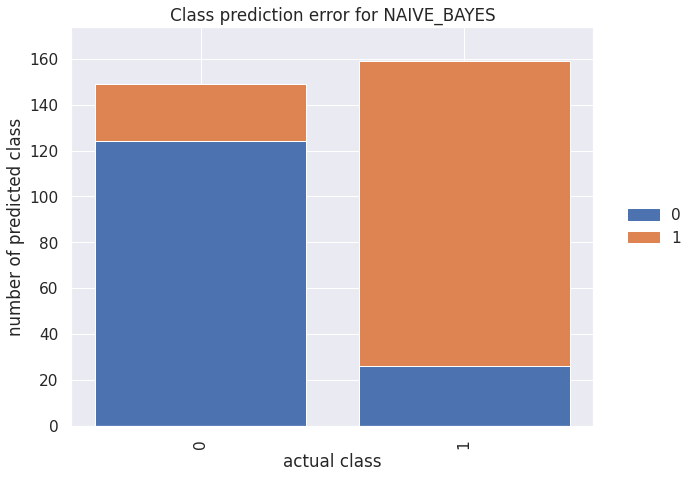

In [249]:
model_evaluator.plot_class_prediction_error() 

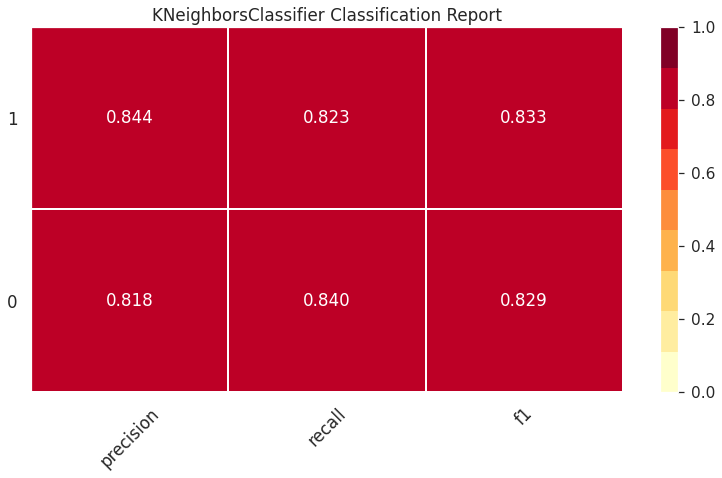

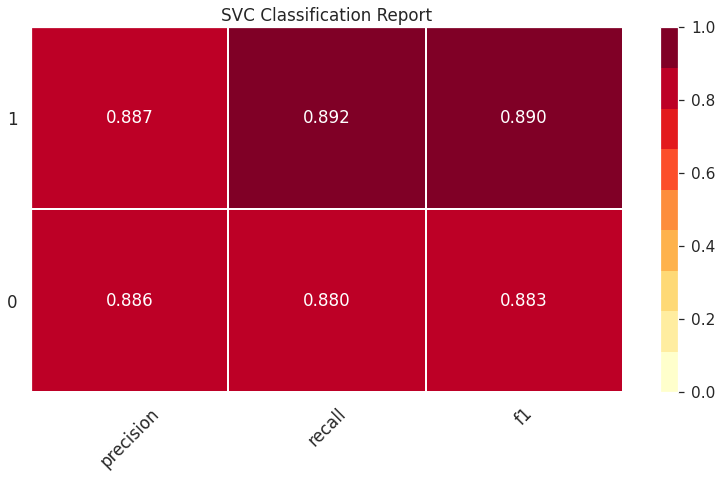

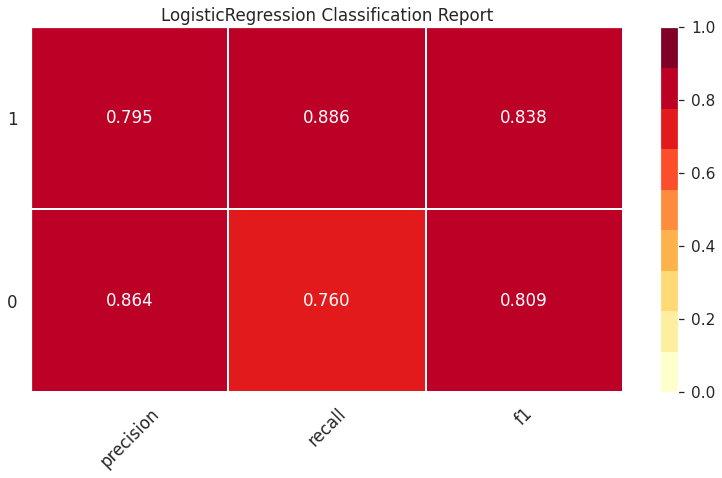

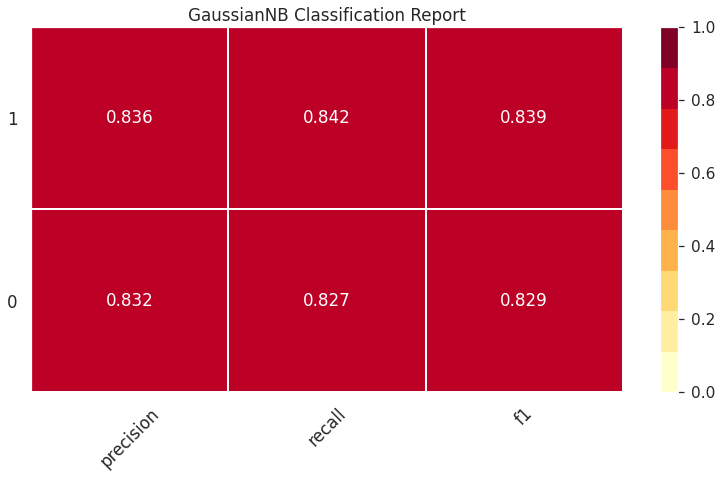

In [250]:
model_evaluator.plot_classification_report()

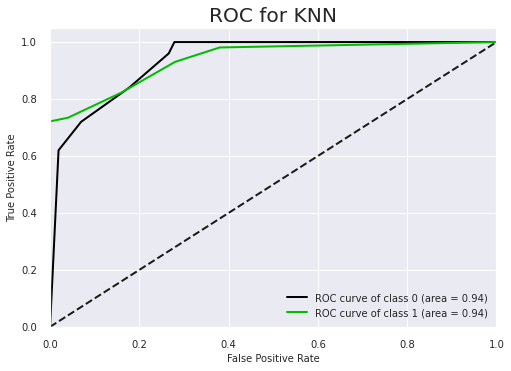

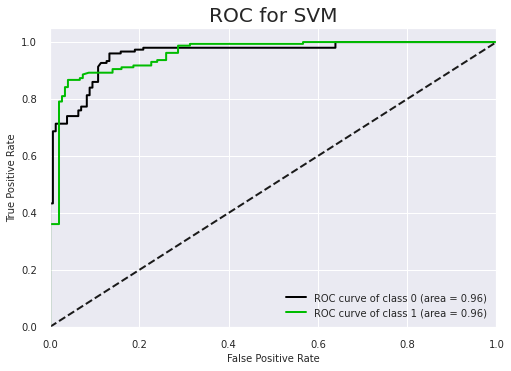

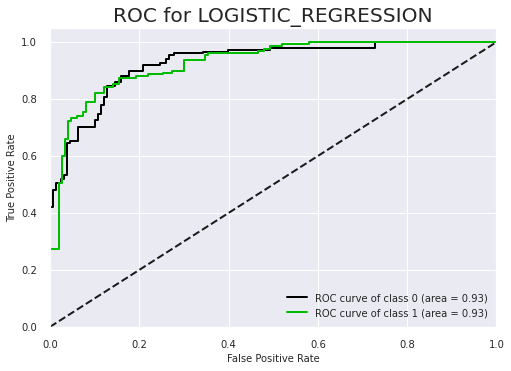

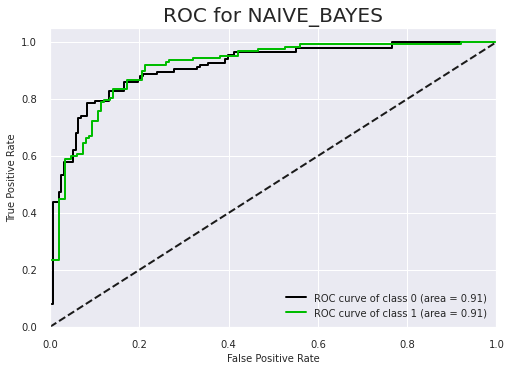

In [251]:
model_evaluator.plot_roc_auc()

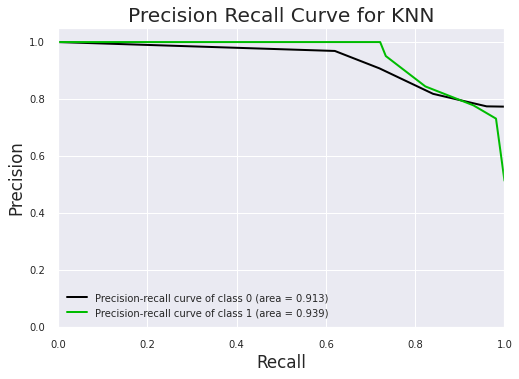

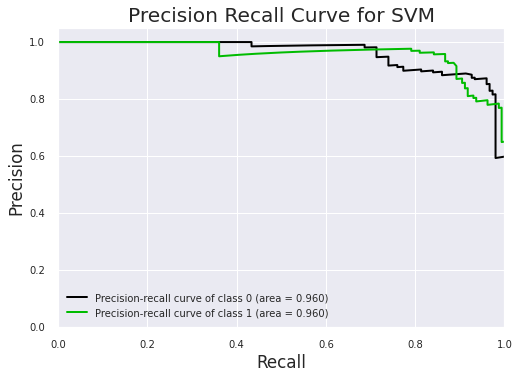

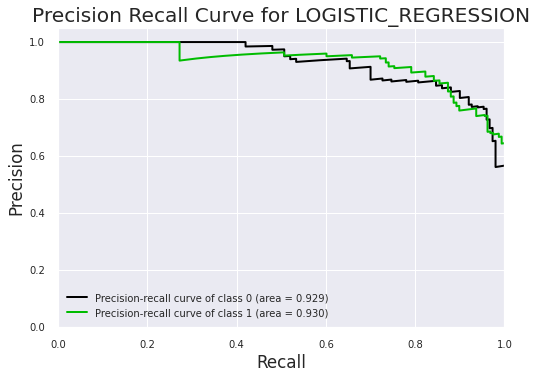

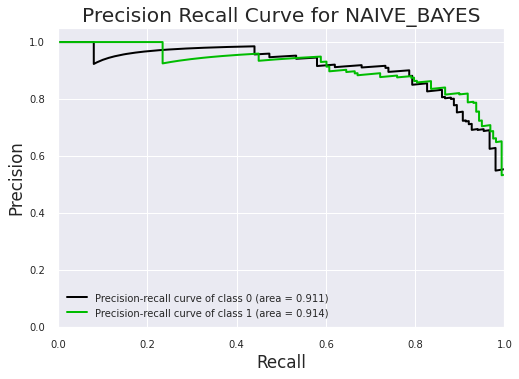

In [252]:
model_evaluator.plot_precision_recal_curve()

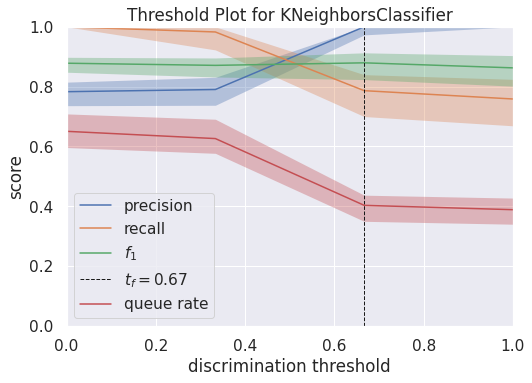

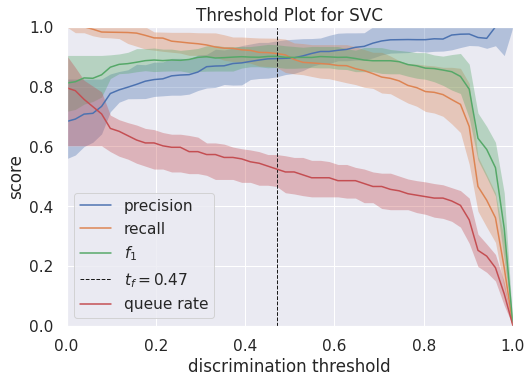

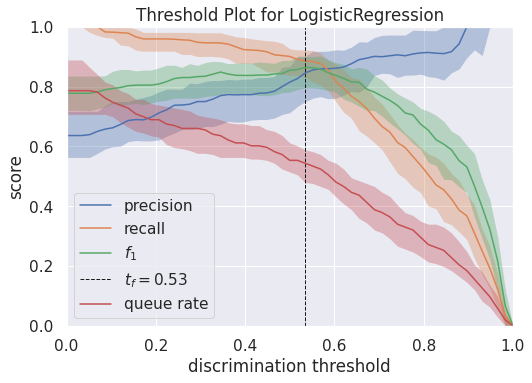

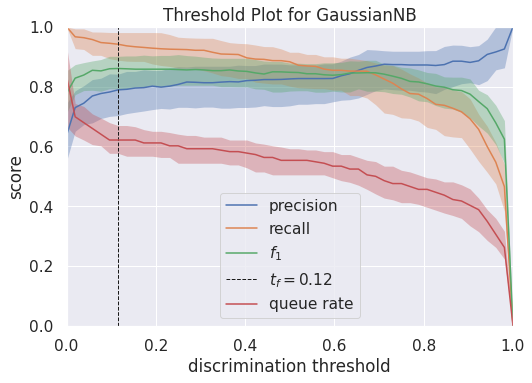

In [253]:
model_evaluator.plot_discrimination_threshold()

# 6. Hyperparameter tuning
---
```
models: dict = {
    'model_name': {
          'model': selected classifier
          'params': { 
              # tuned hyperparamters
              hyperparameter_list_1: []
              hyperparameter_list_2: []
              ...
          }
    }
    ...
}
```

In [267]:
models: dict = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [2, 3, 5, 7, 9, 11, 13, 15],
            'leaf_size': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance'],
        }  
    },
    'SVM': {
        'model': SVC(probability=True),
        'params' : {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'linear', 'sigmoid'],
            'gamma': [1, 0.1, 0.01],
        }  
    },
    'LOGISTIC_REGRESSION' : {
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    },
    'NAIVE_BAYES' : {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(0,-9, num=100),
        }
    },
}

In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

class ModelRegularization(ModelPerformance):

    def __init__(self, models: dict, dataset: dict):
        super(ModelRegularization, self).__init__(models, dataset)
        for index, model in enumerate(self.models): print(f'{index + 1} - {model}')

    def tune_hyperparamters(self):
        for algorithm, model in self.models.items():
            classifier =  GridSearchCV(  
                model['model'],                
                model['params'],         
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),                     
                return_train_score=False,
            )

            classifier.fit(self.X_train, self.y_train) 

            self._calculate_model_score(algorithm, classifier.best_estimator_)
            
            self.classifiers[algorithm] = classifier.best_estimator_ 
            print(f'''
                {algorithm} was trained and tuned
                The best parameters for {algorithm}: {classifier.best_params_}
                ------------------------------------------------
            ''')
            
        self.classifiers_df = pd.DataFrame(self.scores, 
                                           columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

In [269]:
model_regularizator = ModelRegularization(models=models, dataset=dataset)

1 - KNN
2 - SVM
3 - LOGISTIC_REGRESSION
4 - NAIVE_BAYES


In [270]:
model_regularizator.tune_hyperparamters()


                KNN was trained and tuned
                The best parameters for KNN: {'leaf_size': 1, 'n_neighbors': 11, 'weights': 'distance'}
                ------------------------------------------------
            

                SVM was trained and tuned
                The best parameters for SVM: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
                ------------------------------------------------
            

                LOGISTIC_REGRESSION was trained and tuned
                The best parameters for LOGISTIC_REGRESSION: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
                ------------------------------------------------
            

                NAIVE_BAYES was trained and tuned
                The best parameters for NAIVE_BAYES: {'var_smoothing': 0.006579332246575682}
                ------------------------------------------------
            


In [271]:
model_regularizator.classifiers_df

,Model,Accuracy,F1-Score,Precision,Recall
0,KNN,0.990260,0.990261,0.990451,0.990260
1,SVM,0.990260,0.990261,0.990451,0.990260
2,LOGISTIC_REGRESSION,0.821429,0.820272,0.826918,0.821429
3,NAIVE_BAYES,0.831169,0.831169,0.831169,0.831169


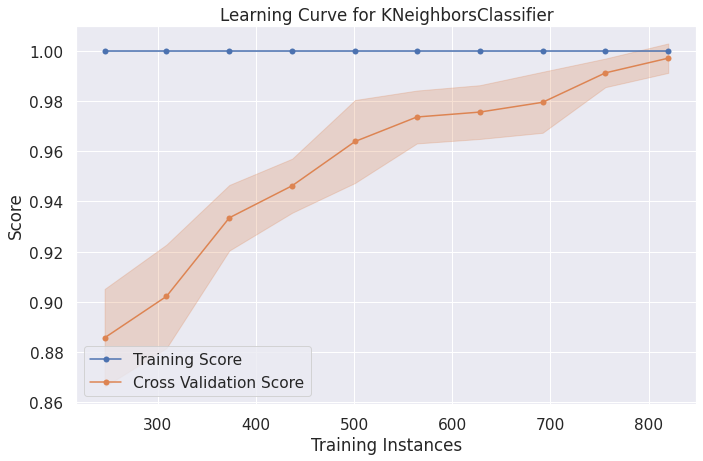

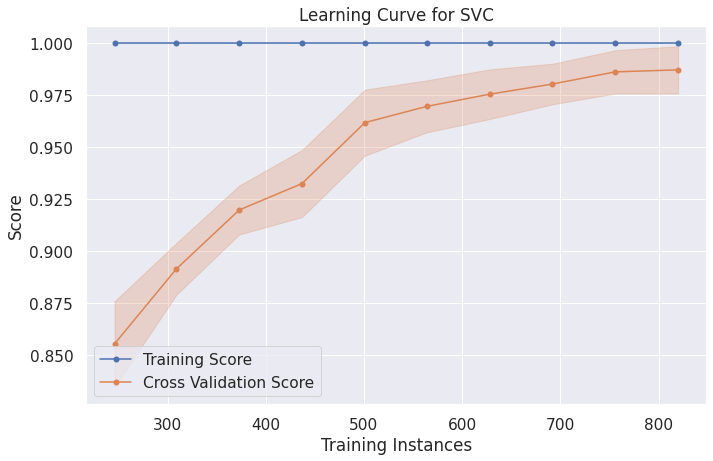

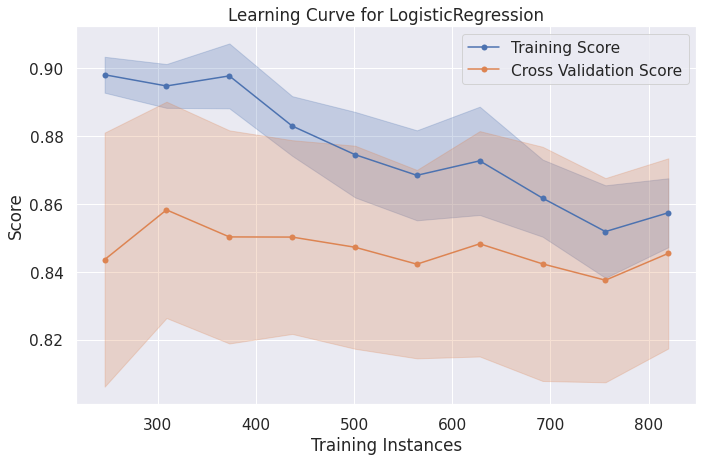

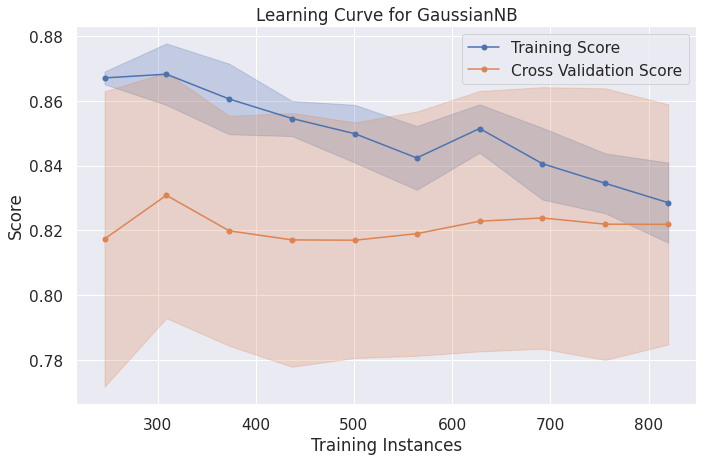

In [272]:
model_regularizator.plot_learning_curve()

In [273]:
tuned_classifiers = model_regularizator.classifiers
tuned_classifiers

{'KNN': KNeighborsClassifier(leaf_size=1, n_neighbors=11, weights='distance'),
 'SVM': SVC(C=100, gamma=1, probability=True),
 'LOGISTIC_REGRESSION': LogisticRegression(C=100, solver='newton-cg'),
 'NAIVE_BAYES': GaussianNB(var_smoothing=0.006579332246575682)}

# 7. Tuned Model Evaluation

In [274]:
model_evaluator = ModelEvaluation(estimators=tuned_classifiers, dataset=dataset)

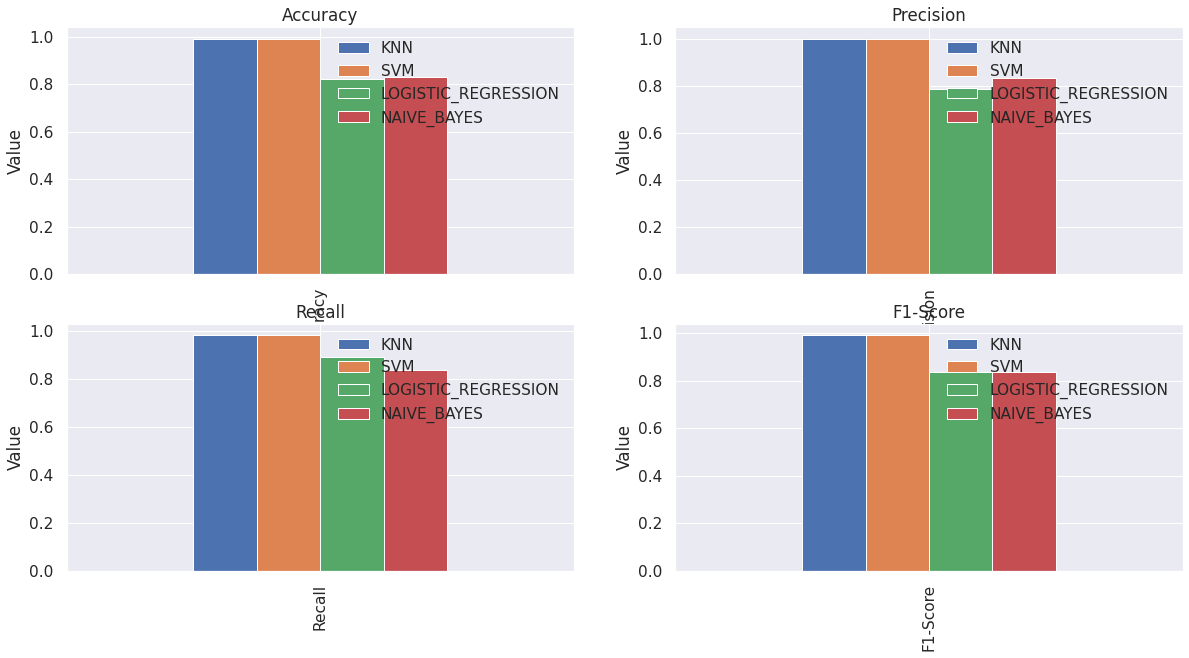

In [275]:
model_evaluator.plot_scores()

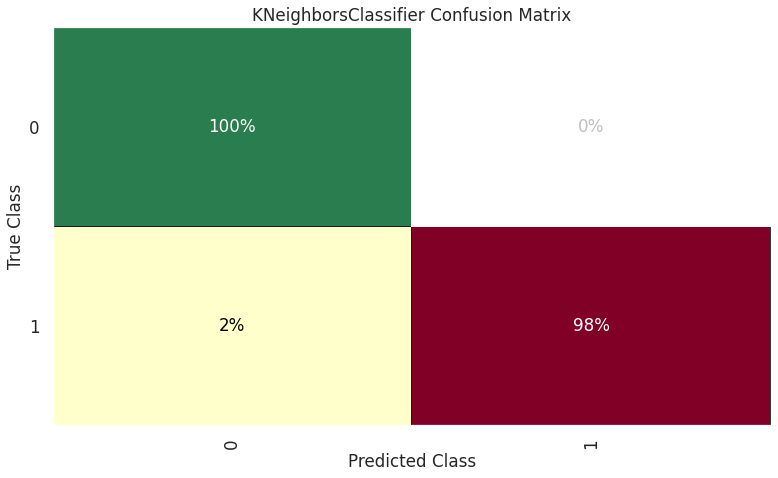

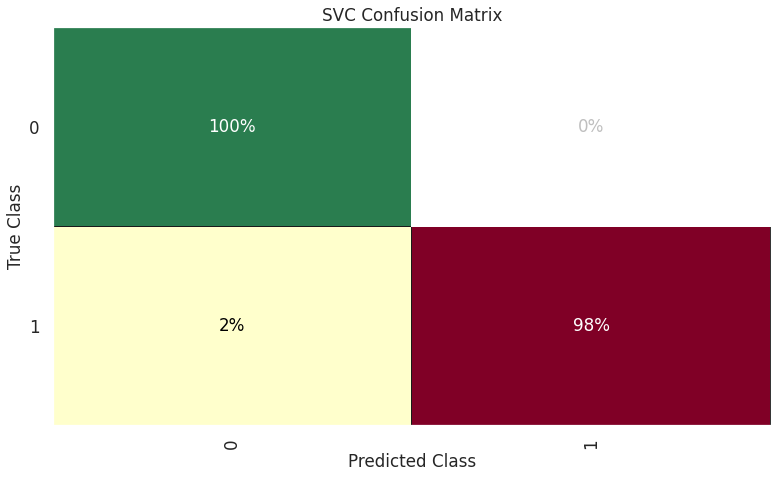

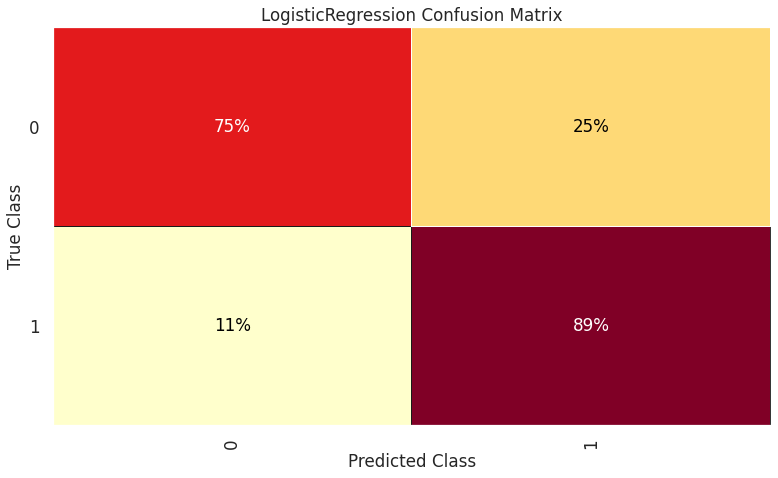

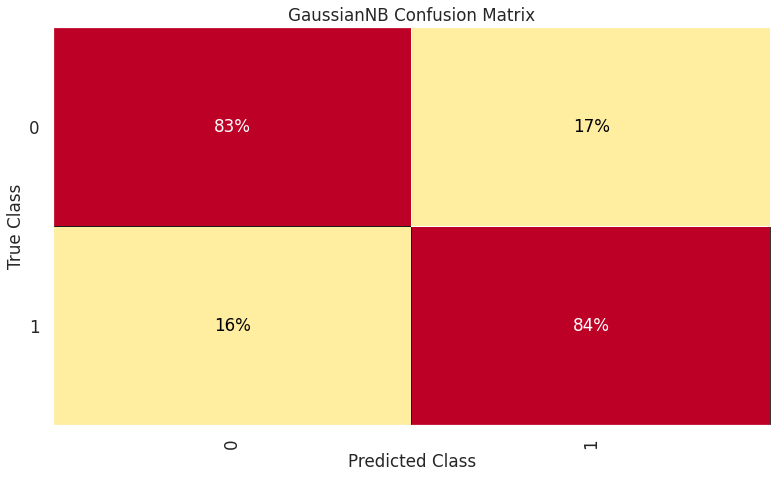

In [276]:
model_evaluator.plot_confusion_matrix()

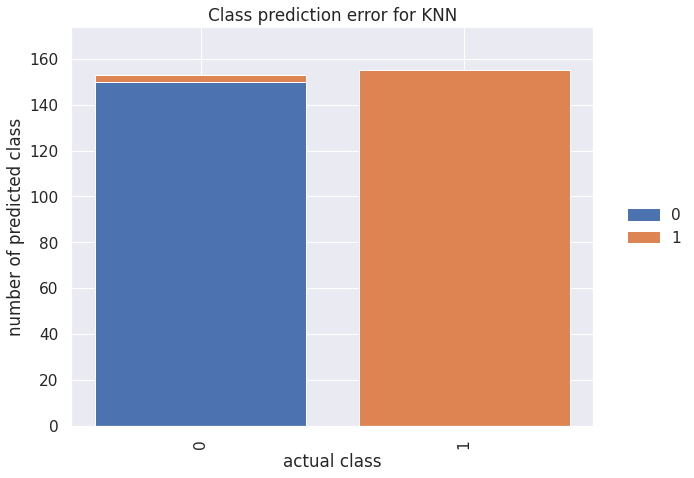

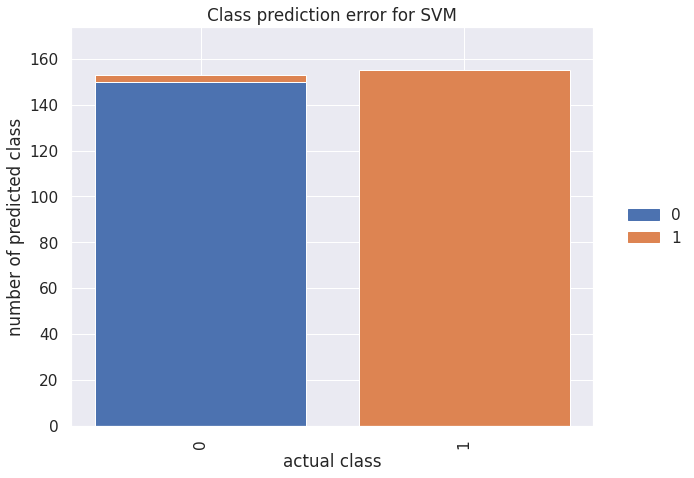

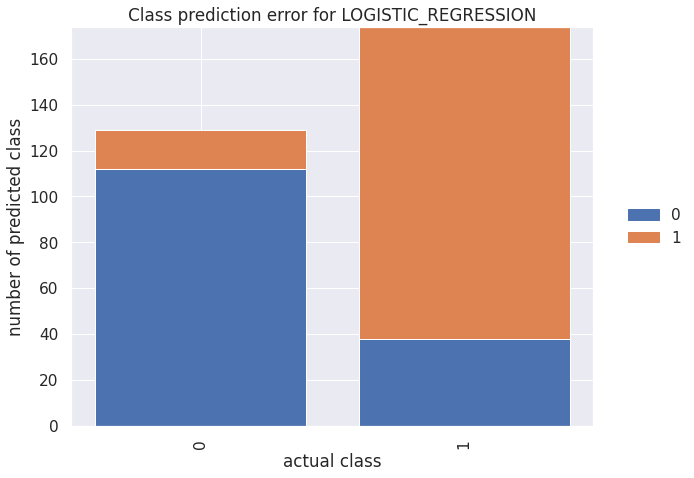

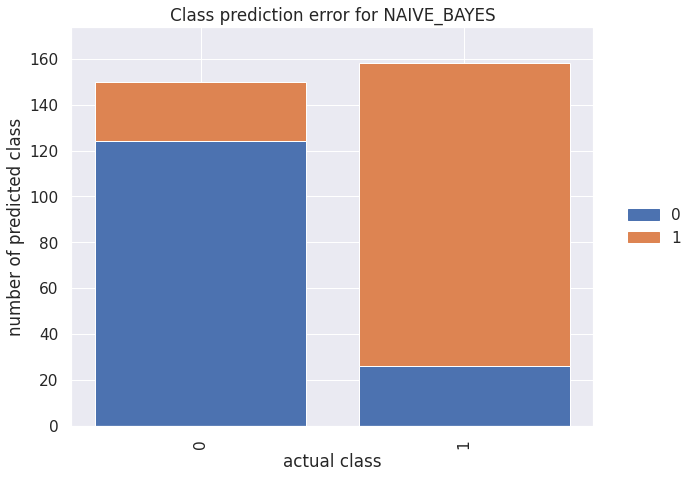

In [277]:
model_evaluator.plot_class_prediction_error() 

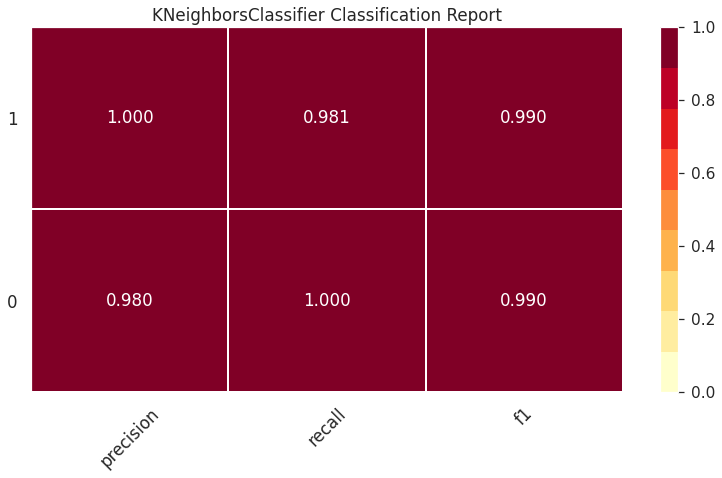

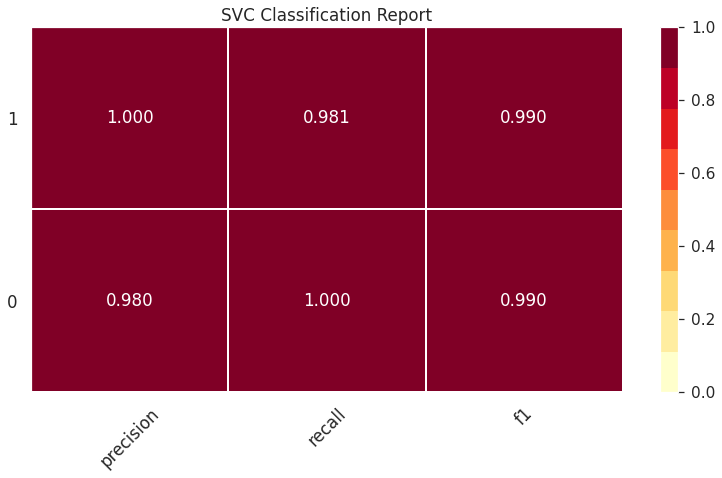

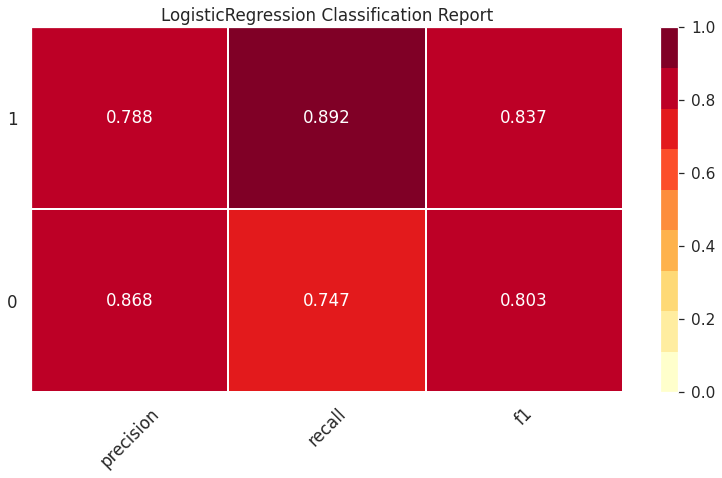

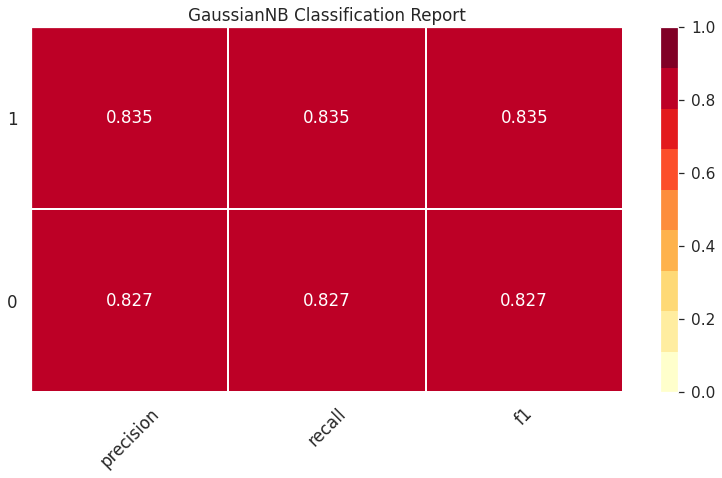

In [278]:
model_evaluator.plot_classification_report()

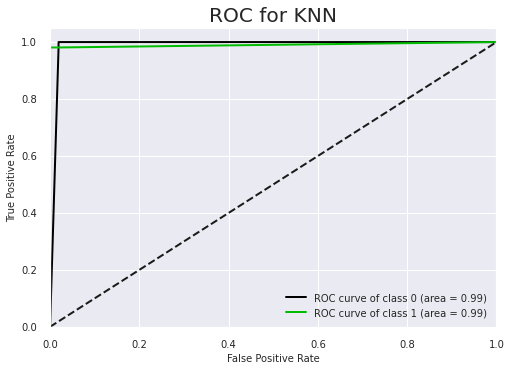

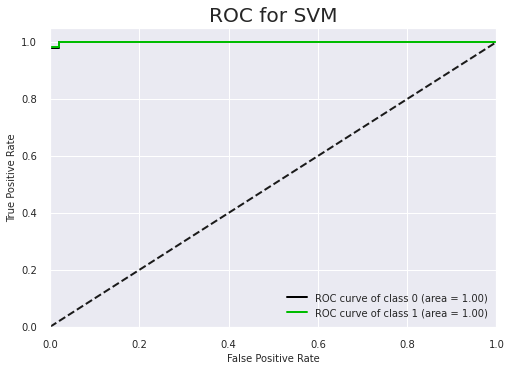

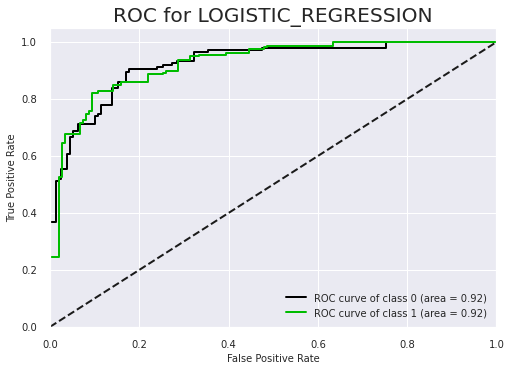

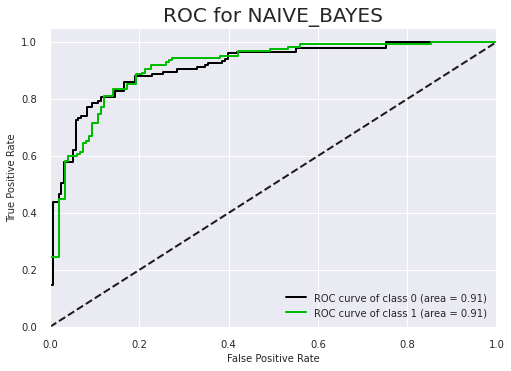

In [279]:
model_evaluator.plot_roc_auc()

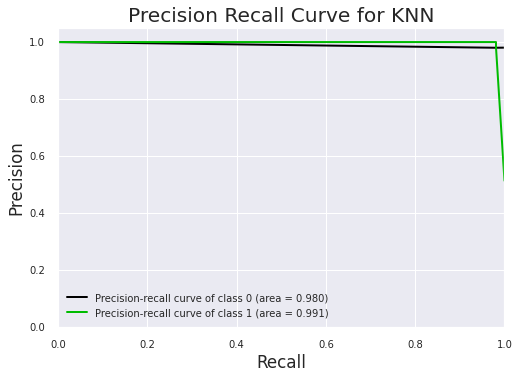

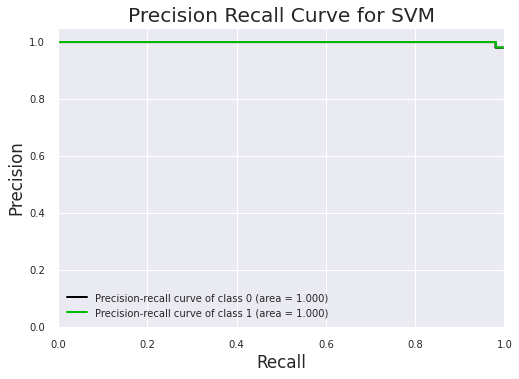

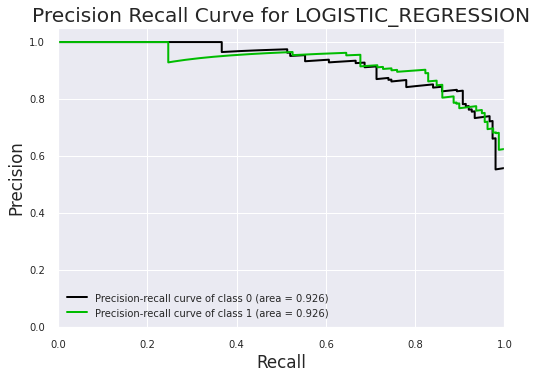

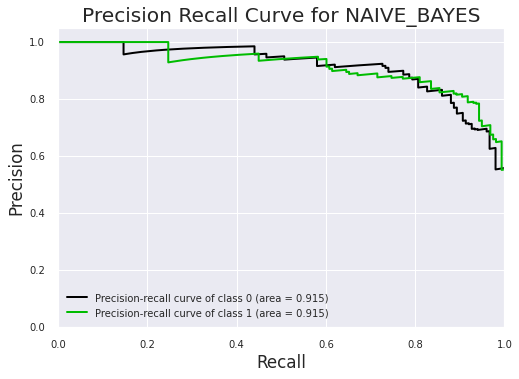

In [280]:
model_evaluator.plot_precision_recal_curve()

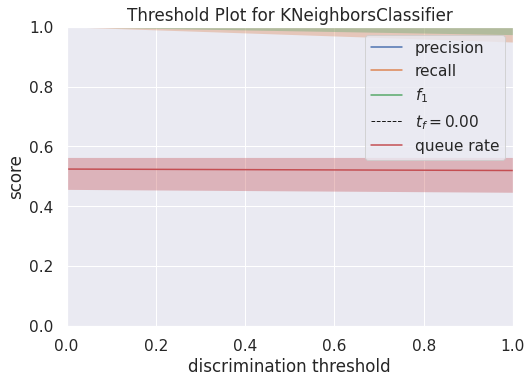

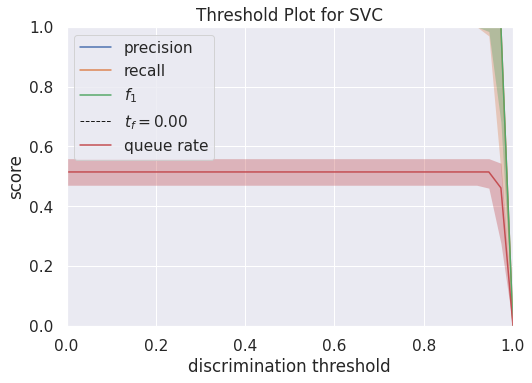

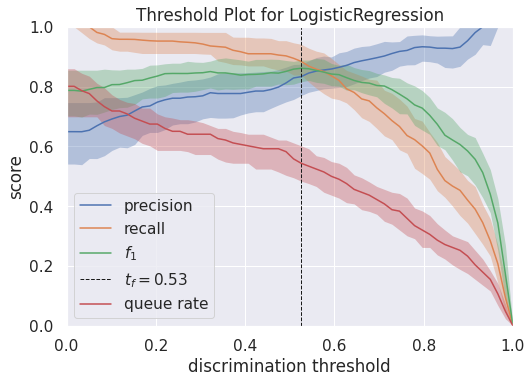

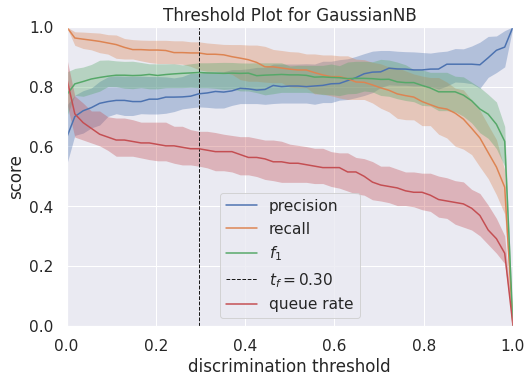

In [281]:
model_evaluator.plot_discrimination_threshold()

# 7. Save and Load Model

In [282]:
for index, tuned_classifier in enumerate(tuned_classifiers):
    print(f'{index+1}. {tuned_classifiers[tuned_classifier]}')

1. KNeighborsClassifier(leaf_size=1, n_neighbors=11, weights='distance')
2. SVC(C=100, gamma=1, probability=True)
3. LogisticRegression(C=100, solver='newton-cg')
4. GaussianNB(var_smoothing=0.006579332246575682)


In [283]:
MODEL_DIR_PATH = '/content/drive/MyDrive/projects/classification_model'

In [284]:
for tuned_classifier in tuned_classifiers:
    selected_model = tuned_classifiers[tuned_classifier]
    
    path = f"{MODEL_DIR_PATH}/HEART_DISEASE_{tuned_classifier}.pt" 
    
    with open(path, 'wb') as file:
        pickle.dump(selected_model, file)

In [286]:
path = f"{MODEL_DIR_PATH}/HEART_DISEASE_KNN.pt" 

with open(path, 'rb') as file:
    model = pickle.load(file)

model

KNeighborsClassifier(leaf_size=1, n_neighbors=11, weights='distance')